In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

In [32]:
df = pd.read_csv('/Users/roxyallen/Desktop/yelp_labelled.txt', delimiter= '\t', header=None)
df.columns = ['message', 'label']

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
message    1000 non-null object
label      1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [34]:
df.head()

,message,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [35]:
keywords = ['love', 'loved', 'not', 'worst', 'delicious', 'friendly', 'unfortunately', 'like', 'liked', 'service', 'food', 'good', 'great', 'place', 'bad', 'fresh', 'amazing', 'back', 'disappointed', 'time', 'quality'] 

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [36]:
df.head()

,message,label,love,loved,not,worst,delicious,friendly,unfortunately,like,...,good,great,place,bad,fresh,amazing,back,disappointed,time,quality
0,Wow... Loved this place.,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


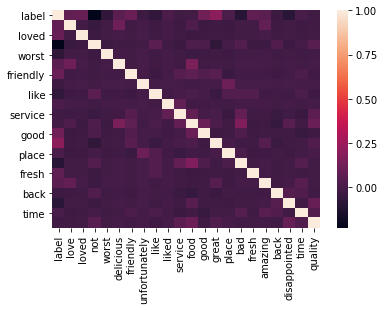

In [37]:
sns.heatmap(df.corr())

In [38]:
data = df[keywords]
target = df['label']

In [39]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 390


The model is not great as there are 390, close to 40%, of the messages, mislabeled based on the features I identified. Looking at the correlations plot, there is a good deal of independence between the variables, so I would need to do more to find out which words better differentiate the messages.

Next, I will apply this model to the IMBD data.

In [40]:
dfimdb = pd.read_csv('/Users/roxyallen/Desktop/imdb_labelled.txt', delimiter= '\t', header=None)
dfimdb.columns = ['message', 'label']

In [41]:
dfimdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
message    748 non-null object
label      748 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [42]:
dfimdb.head()

,message,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [43]:
keywords = ['love', 'loved', 'not', 'worst', 'delicious', 'friendly', 'unfortunately', 'like', 'liked', 'service', 'food', 'good', 'great', 'place', 'bad', 'fresh', 'amazing', 'back', 'disappointed', 'time', 'quality'] 

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    dfimdb[str(key)] = dfimdb.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [44]:
dfimdb.head()

,message,label,love,loved,not,worst,delicious,friendly,unfortunately,like,...,good,great,place,bad,fresh,amazing,back,disappointed,time,quality
0,"A very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,Very little music or anything to speak of.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
dataimdb = dfimdb[keywords]
targetimdb = dfimdb['label']

In [47]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(dataimdb, targetimdb)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(dataimdb)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (targetimdb != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 313


Ha! This model actually works better for the IMDB data!